**Importing the required modules :**

In [1]:
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import keras
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

Using TensorFlow backend.


**Importing the dataset**

In [2]:
#Here we will be using the pandas read_csv function to read the dataset
dataset = pd.read_csv('heart.csv')
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Data Analysis**

Let, we get some basic information about the dataset.

In [3]:
# Here, we check for any null values
# Out of 14 features, we have 13 int types and only one with the float data types
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


From this output, our data does not contain null values and duplicates. So, the data is good which will be further analyzed.

Null values can produce an error during mathematical operations.

In [4]:
# print data characteristics, usings pandas built-in describe() function
# to see how the dataset is spread
print(dataset.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

In [5]:
# Let’s see the size of the dataset

dataset.shape

(303, 14)

**Data visualisation and analysis**

Check the correlation between the features so that we can analyze that which feature is negatively correlated and which is positively correlated

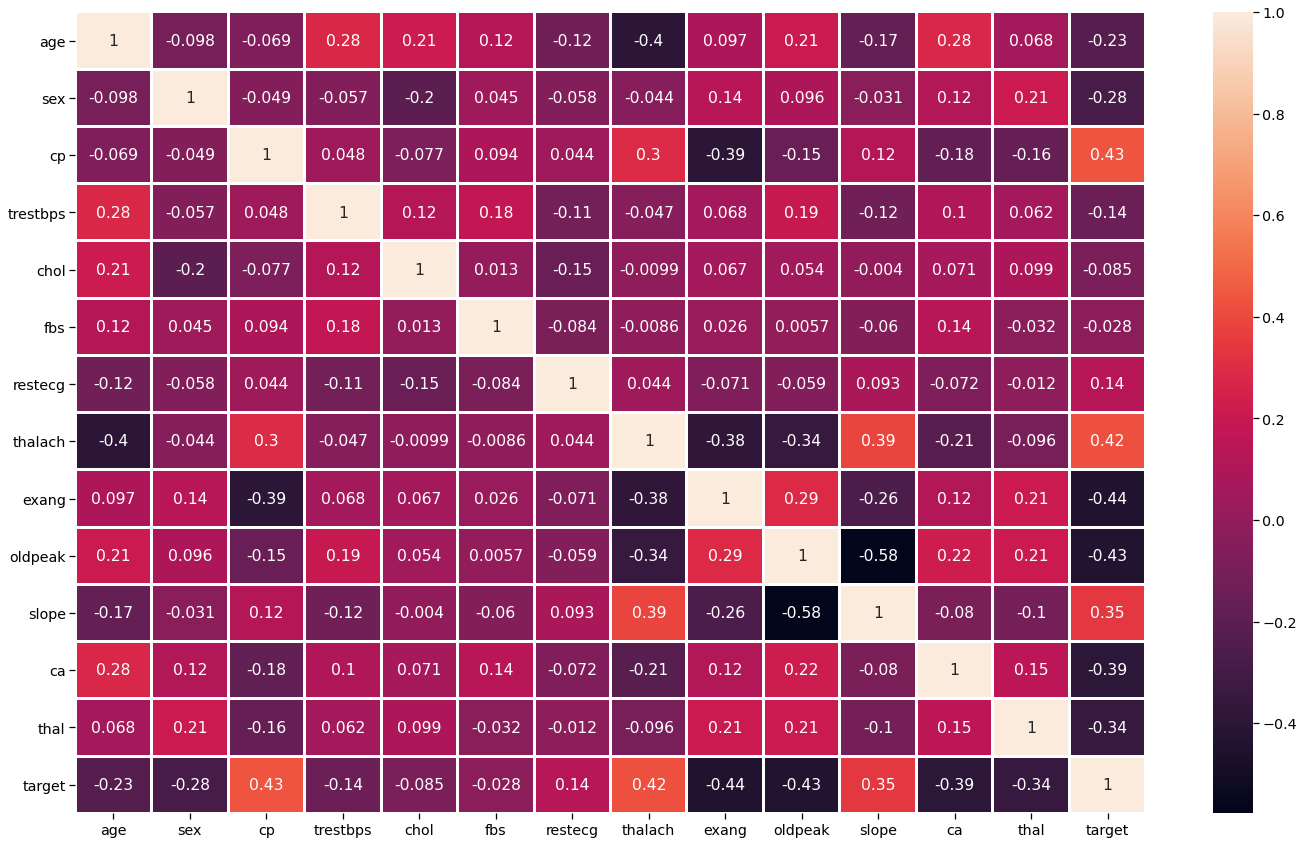

In [6]:
# Check the correlation between various features
plt.figure(figsize=(20,12))
sns.set_context('notebook',font_scale = 1.3)
sns.heatmap(dataset.corr(),annot=True,linewidth =2)
plt.tight_layout()

- From the above heatmap, we can see that Chest pain(cp) and target have a positive correlation. It means that whose has a large risk of chest pain results in a greater chance to have heart disease. In addition to chest pain, thalach, slope, and resting have a positive correlation with the target.

- Then, exercise-induced angina(exang) and the target have a negative correlation which means when we exercise, the heart requires more blood, but narrowed arteries slow down the blood flow. In addition to ca, old peak, thal have a negative correlation with the target.

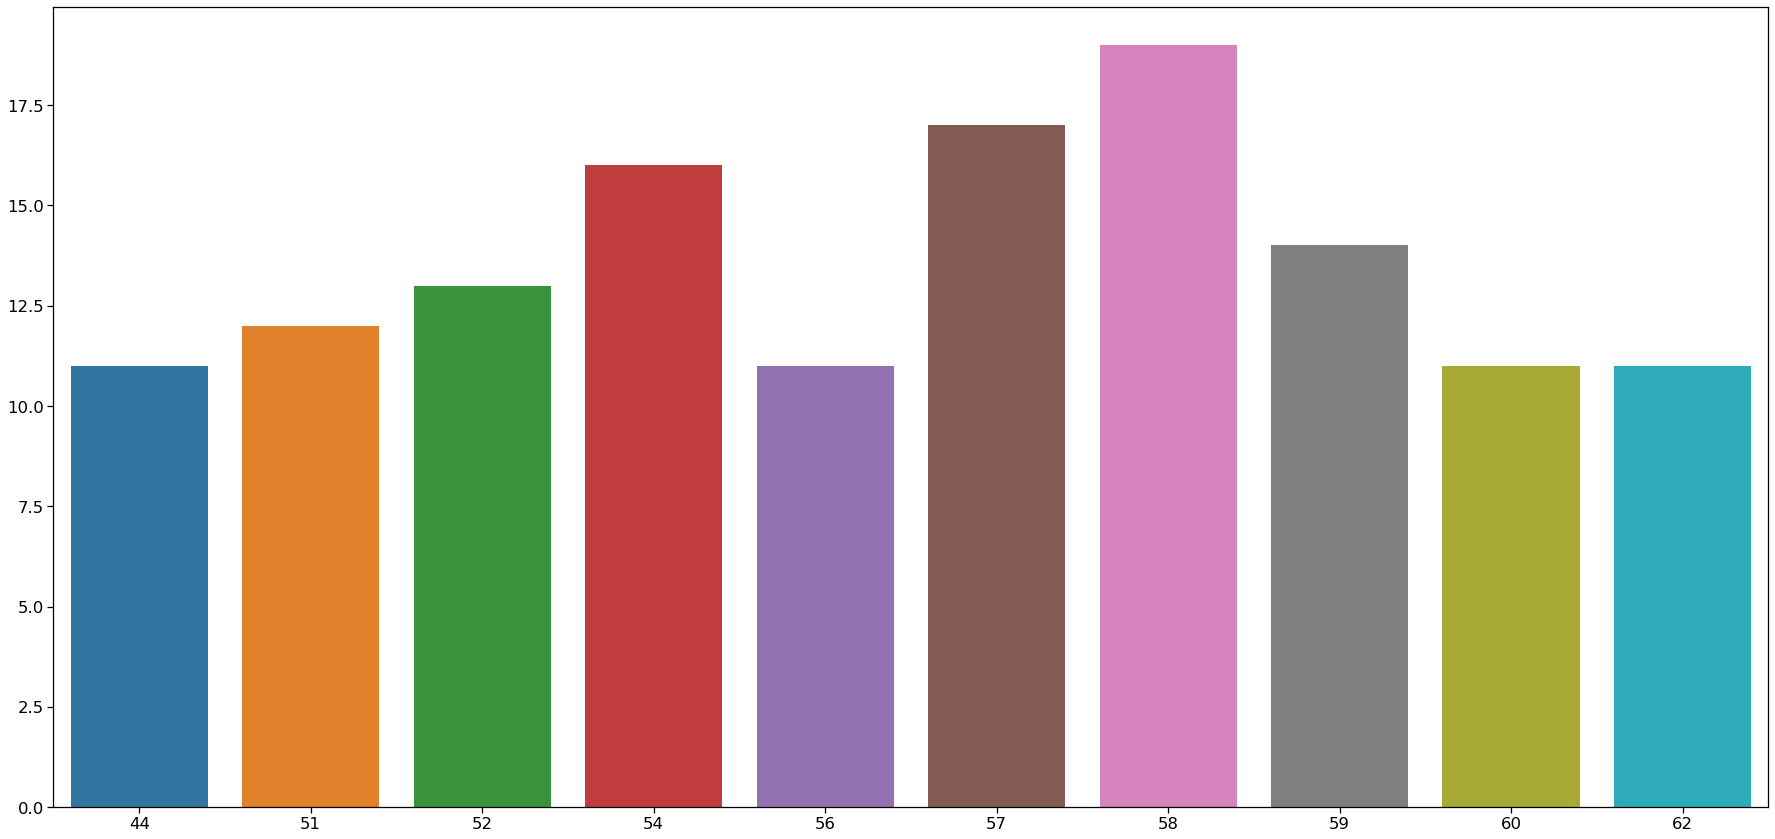

In [7]:
#Age(“age”) Analysis
#Here we will be checking the 10 ages and their counts.
plt.figure(figsize=(25,12))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=dataset.age.value_counts()[:10].index,y=dataset.age.value_counts()[:10].values)
plt.tight_layout()

- 58 age column has the highest frequency.

**Create Training and Testing Datasets**

We can divide the dataset into two sets for training and testing purposes. To accomplish this, we will utilize the train_test_split() function provided by Sklearn. The resulting datasets will consist of 80 percent of the total data for training and 20 percent for testing.

In [8]:
# create X and Y datasets for training
from sklearn import model_selection

X = np.array(dataset.drop(['target'], 1))
y = np.array(dataset['target'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

In [9]:
# convert the data to categorical labels
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
print (Y_train.shape)
print (Y_train[:10])

(242, 2)
[[0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


**Building and Training the Neural Network**

After performing data processing and splitting it into training and testing datasets, we can initiate the creation of a neural network to solve the classification problem. With the help of Keras, we can design a basic neural network that includes one hidden layer. Given that it is a categorical classification problem, we will implement a softmax activation function in the last layer of the network and employ categorical_crossentropy loss while training.

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# define a function to build the keras model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(2, activation='softmax'))
    
    # compile model
    adam = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 112       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 10        
Total params: 158
Trainable params: 158
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
# fit the model to the training data
model.fit(X_train, Y_train, epochs=100, batch_size=10, verbose = 1)

Epoch 1/100
242/242 [==============================] - 0s 252us/step - loss: 0.7285 - accuracy: 0.5248
Epoch 2/100
242/242 [==============================] - 0s 66us/step - loss: 0.6908 - accuracy: 0.5372
Epoch 3/100
242/242 [==============================] - 0s 62us/step - loss: 0.6792 - accuracy: 0.5744
Epoch 4/100
242/242 [==============================] - 0s 58us/step - loss: 0.6756 - accuracy: 0.5537
Epoch 5/100
242/242 [==============================] - 0s 62us/step - loss: 0.6429 - accuracy: 0.6653
Epoch 6/100
242/242 [==============================] - 0s 70us/step - loss: 0.6346 - accuracy: 0.6653
Epoch 7/100
242/242 [==============================] - 0s 58us/step - loss: 0.6176 - accuracy: 0.6860
Epoch 8/100
242/242 [==============================] - 0s 62us/step - loss: 0.6153 - accuracy: 0.6901
Epoch 9/100
242/242 [==============================] - 0s 58us/step - loss: 0.6039 - accuracy: 0.7107
Epoch 10/100
242/242 [==============================] - 0s 58us/step - loss: 0.59

**Improving Results - A Binary Classification Problem**

In [12]:
# convert into binary classification problem - heart disease or no heart disease
Y_train_binary = y_train.copy()
Y_test_binary = y_test.copy()

Y_train_binary[Y_train_binary > 0] = 1
Y_test_binary[Y_test_binary > 0] = 1

print (Y_train_binary[:20])

[1 0 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1]


In [13]:
# define a new keras model for binary classification
def create_binary_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    adam = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

binary_model = create_binary_model()

print(binary_model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 8)                 112       
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 5         
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________
None


In [14]:
# fit the binary model on the training data
binary_model.fit(X_train, Y_train_binary, epochs=100, batch_size=10, verbose = 1)

Epoch 1/100
242/242 [==============================] - 0s 295us/step - loss: 0.6961 - accuracy: 0.5413
Epoch 2/100
242/242 [==============================] - 0s 70us/step - loss: 0.6876 - accuracy: 0.5579
Epoch 3/100
242/242 [==============================] - 0s 62us/step - loss: 0.6730 - accuracy: 0.6446
Epoch 4/100
242/242 [==============================] - 0s 65us/step - loss: 0.6714 - accuracy: 0.5950
Epoch 5/100
242/242 [==============================] - 0s 62us/step - loss: 0.6572 - accuracy: 0.6322
Epoch 6/100
242/242 [==============================] - 0s 62us/step - loss: 0.6524 - accuracy: 0.6116
Epoch 7/100
242/242 [==============================] - 0s 62us/step - loss: 0.6479 - accuracy: 0.6405
Epoch 8/100
242/242 [==============================] - 0s 62us/step - loss: 0.6369 - accuracy: 0.7149
Epoch 9/100
242/242 [==============================] - 0s 62us/step - loss: 0.6276 - accuracy: 0.7107
Epoch 10/100
242/242 [==============================] - 0s 62us/step - loss: 0.62

**Results and Metrics**

Although we have obtained accuracy outcomes for the training data, it is imperative to assess the model's performance on the testing dataset. The model's effectiveness is compromised if it fails to generalize to data that it hasn't been exposed to during training.

Hence, we will evaluate the performance of both the categorical and binary models by generating predictions on the testing dataset and calculating relevant performance metrics using Sklearn.

Categorical model:

In [15]:
# generate classification report using predictions for categorical model
from sklearn.metrics import classification_report, accuracy_score

categorical_pred = np.argmax(model.predict(X_test), axis=1)

print('Results for Categorical Model')
print(accuracy_score(y_test, categorical_pred))
print(classification_report(y_test, categorical_pred))

Results for Categorical Model
0.819672131147541
              precision    recall  f1-score   support

           0       0.79      0.82      0.81        28
           1       0.84      0.82      0.83        33

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



Binary model:

In [16]:
# generate classification report using predictions for binary model 
binary_pred = np.round(binary_model.predict(X_test)).astype(int)

print('Results for Binary Model')
print(accuracy_score(Y_test_binary, binary_pred))
print(classification_report(Y_test_binary, binary_pred))

Results for Binary Model
0.7704918032786885
              precision    recall  f1-score   support

           0       0.77      0.71      0.74        28
           1       0.77      0.82      0.79        33

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61

